<a href="https://colab.research.google.com/github/XcLyBr/Defaulting-Card-Payment/blob/main/DefaultingCreditCards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEFAULTING IN CREDIT CARD PAYMENTS**

By: Jose Antonio Villegas

# PROJECT DESCRIPTION

The purpose or goal of this project is to predict or identify consumers who are likely to default on their credit card payments. This data set consists of 13,444 observations with 14 variables.

This is a Classification Problem.

# Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import set_config 
set_config(display ="diagram")

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score

In [3]:
path = '/content/credit_data.csv'
df = pd.read_csv(path)
df.head()

,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
0,0,0,27.250000,4,0,0,0,0,1200.000000,0,18000.0,0.000667,,
1,0,0,40.833332,111,3,0,0,1,4000.000000,0,13500.0,0.000222,,
2,1,0,37.666668,54,3,0,0,1,3666.666667,0,11300.0,0.033270,121.9896773,4.8039364
3,1,0,42.500000,60,3,0,0,1,2000.000000,0,17250.0,0.048427,96.8536213,4.5732008
4,1,0,21.333334,8,0,0,0,0,2916.666667,0,35000.0,0.016523,48.1916700,3.8751862


Source : https://www.kaggle.com/surekharamireddy/credit-data

# Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13444 entries, 0 to 13443
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CARDHLDR   13444 non-null  int64  
 1   DEFAULT    13444 non-null  int64  
 2   AGE        13444 non-null  float64
 3   ACADMOS    13444 non-null  int64  
 4   ADEPCNT    13444 non-null  int64  
 5   MAJORDRG   13444 non-null  int64  
 6   MINORDRG   13444 non-null  int64  
 7   OWNRENT    13444 non-null  int64  
 8   INCOME     13444 non-null  float64
 9   SELFEMPL   13444 non-null  int64  
 10  INCPER     13444 non-null  float64
 11  EXP_INC    13444 non-null  float64
 12  SPENDING   13444 non-null  object 
 13  LOGSPEND   13444 non-null  object 
dtypes: float64(4), int64(8), object(2)
memory usage: 1.4+ MB


# Data Statistics

In [5]:
df.describe()

,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC
count,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000
mean,0.780943,0.074085,33.471828,55.318878,1.017257,0.462809,0.290539,0.455965,2509.527819,0.057944,21719.680793,0.070974
std,0.413623,0.261919,10.226484,63.089729,1.279098,1.432724,0.767620,0.498076,1252.946716,0.233646,13591.209469,0.103922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,362.500000,0.000088
25%,1.000000,0.000000,25.666666,12.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.000000,12000.000000,0.002706
50%,1.000000,0.000000,31.500000,30.000000,1.000000,0.000000,0.000000,0.000000,2166.666667,0.000000,19000.000000,0.039286
75%,1.000000,0.000000,39.333332,72.000000,2.000000,0.000000,0.000000,1.000000,2916.666667,0.000000,27658.666504,0.095655
max,1.000000,1.000000,88.666664,576.000000,9.000000,22.000000,11.000000,1.000000,8333.250000,1.000000,150000.000000,2.037728


# Description of Data

In [6]:

# CARDHLDR  1 if application for credit card accepted, 0 if not
# DEFAULT   1 if defaulted 0 if not (observed when CARDHLDR=1, 10,499 observations)
# AGE       Age in years plus twelfths of a year
# ACADMOS   months living at current address
# ADEPCNT   number of dependents
# MAJORDRG  Number of major derogatory reports
# MINORDRG  Number of minor derogatory reports
# OWNRENT   1 if owns their home, 0 if rent
# INCOME    Monthly income (divided by 10,000)
# SELFEMPL  1 if self employed, 0 if not
# INCPER    Income divided by number of dependents
# EXP_INC   Ratio of monthly credit card expenditure to yearly income
# SPENDING  Average monthly credit card expenditure (for CARDHOLDER = 1)
# LOGSPEND  Log of spending

By info() we see that the dataframe is made up of 14 columns and 13444 rows with a mix of int, float and object.

# Unnecessary Columns

In [7]:
df.columns

Index(['CARDHLDR', 'DEFAULT', 'AGE', 'ACADMOS', 'ADEPCNT', 'MAJORDRG',
       'MINORDRG', 'OWNRENT', 'INCOME', 'SELFEMPL', 'INCPER', 'EXP_INC',
       'SPENDING', 'LOGSPEND '],
      dtype='object')

Performed df.columns because there was an error that 'LOGSPEND' could "not be found in axis". A space was found before the quotation mark.


In [8]:
df = df.drop(columns = ['CARDHLDR', 'LOGSPEND ', 'SPENDING'])

Description shows that 'CARDHLDR' application has been accepted or not. Dropped this because it is assumed that data is for cardholder and not applicants.

'LOGSPEND' dropped by description just show log of spending, not much information.

# Duplicate Check

In [9]:
df.duplicated().sum()

0

No duplicate found on the dataset.

# Null Values Check

In [10]:
df.isnull().sum()

DEFAULT     0
AGE         0
ACADMOS     0
ADEPCNT     0
MAJORDRG    0
MINORDRG    0
OWNRENT     0
INCOME      0
SELFEMPL    0
INCPER      0
EXP_INC     0
dtype: int64

Zero null values.

# Visualizations

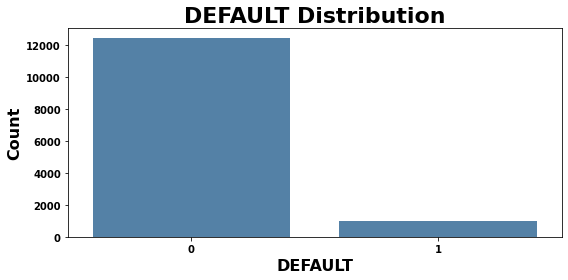

In [11]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x = "DEFAULT", color='steelblue');
plt.title('DEFAULT Distribution', fontsize = 22, weight='bold');
plt.xlabel('DEFAULT', fontsize = 16, weight='bold');
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()

Most distribution of data gathered leans towards 0 or not defaulted. 


This is our target value to predict and it is unbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


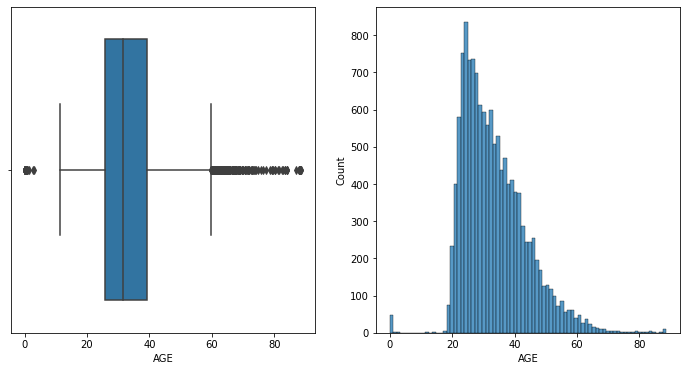

In [12]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['AGE'], ax=ax[0])
sns.histplot(df['AGE'], ax=ax[1]);

In [13]:
df['AGE'].value_counts()

24.833334    78
24.250000    75
26.000000    74
25.000000    68
23.083334    67
             ..
84.166664     1
1.583333      1
76.333336     1
68.833336     1
73.416664     1
Name: AGE, Length: 643, dtype: int64

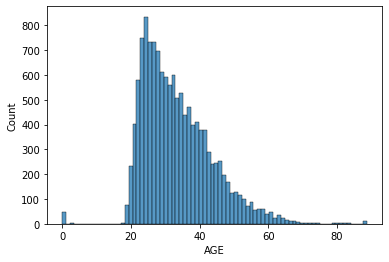

In [14]:
sns.histplot(data=df, x = "AGE");

Noticeably there are outliers in our 'AGE' data but manageable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


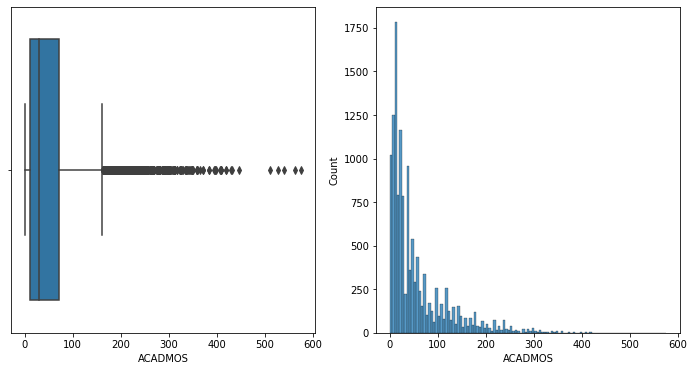

In [15]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['ACADMOS'], ax=ax[0])
sns.histplot(df['ACADMOS'], ax=ax[1]);

Noticeably there are outliers in our 'ACADMOS' data. (Months living in current address)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


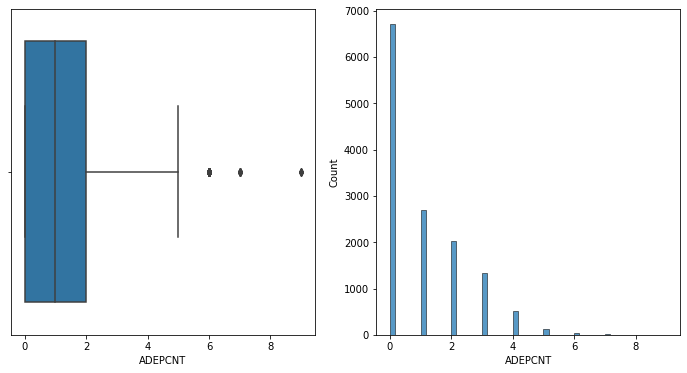

In [16]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['ADEPCNT'], ax=ax[0])
sns.histplot(df['ADEPCNT'], ax=ax[1]);

Minimal outliers seen in 'ADEPCNT'. (Number of dependents)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


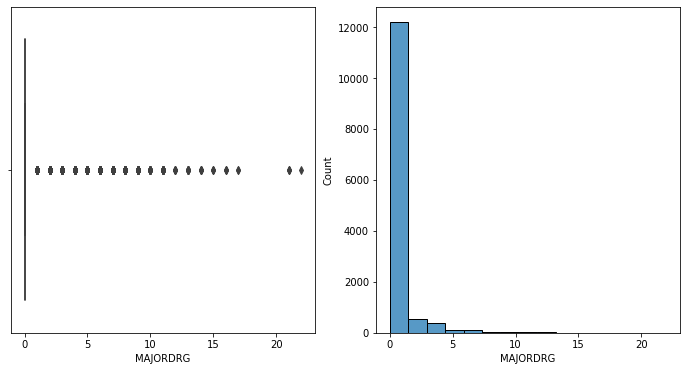

In [17]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['MAJORDRG'], ax=ax[0])
sns.histplot(df['MAJORDRG'], ax=ax[1]);

Noticeably outliers in the 'MAJORDRG' (Number of major derogatory reports)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


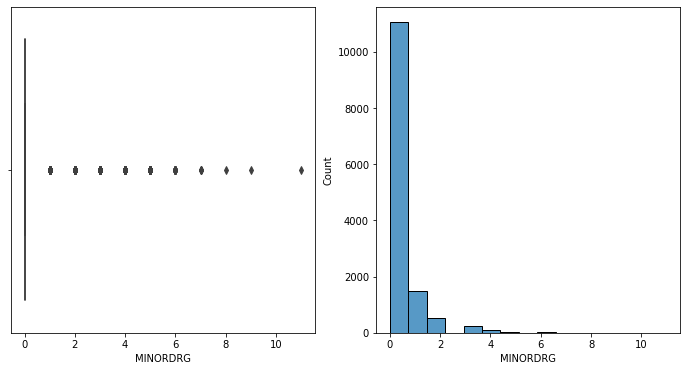

In [18]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['MINORDRG'], ax=ax[0])
sns.histplot(df['MINORDRG'], ax=ax[1]);

Minimal outliers for the 'MINORDRG' (Number of minor derogatory reports)

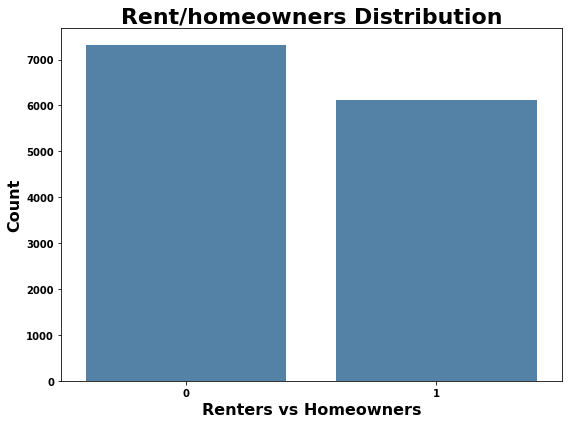

In [19]:
plt.figure(figsize = (8,6))
sns.countplot(data=df, x = "OWNRENT", color='steelblue');
plt.title('Rent/homeowners Distribution', fontsize = 22, weight='bold');
plt.xlabel('Renters vs Homeowners', fontsize = 16, weight='bold');
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()

In [20]:
df['OWNRENT'].value_counts()

0    7314
1    6130
Name: OWNRENT, dtype: int64

Graph compares (0) renters to (1) homeowners.

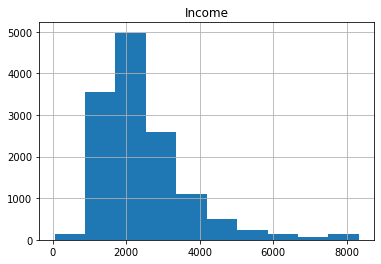

In [21]:
df['INCOME'].hist();
plt.title('Income');

INCOME    Monthly income (divided by 10,000)

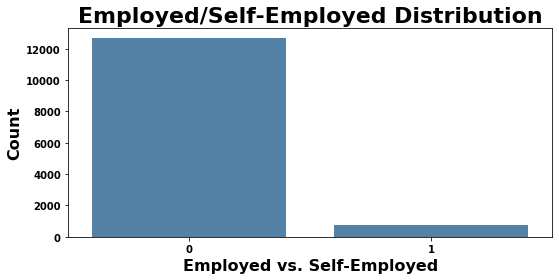

In [22]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x = "SELFEMPL", color='steelblue');
plt.title('Employed/Self-Employed Distribution', fontsize = 22, weight='bold');
plt.xlabel('Employed vs. Self-Employed', fontsize = 16, weight='bold');
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()

In [23]:
df['SELFEMPL'].value_counts()

0    12665
1      779
Name: SELFEMPL, dtype: int64

Noticeably that there are more employed(0) than self-employed(1).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


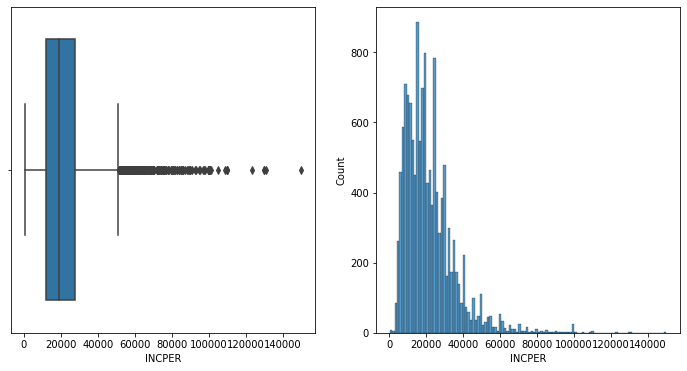

In [24]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['INCPER'], ax=ax[0])
sns.histplot(df['INCPER'], ax=ax[1]);

A noticeably high number of outliers on 'INCPER' (Income Divided by Number of Dependents)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


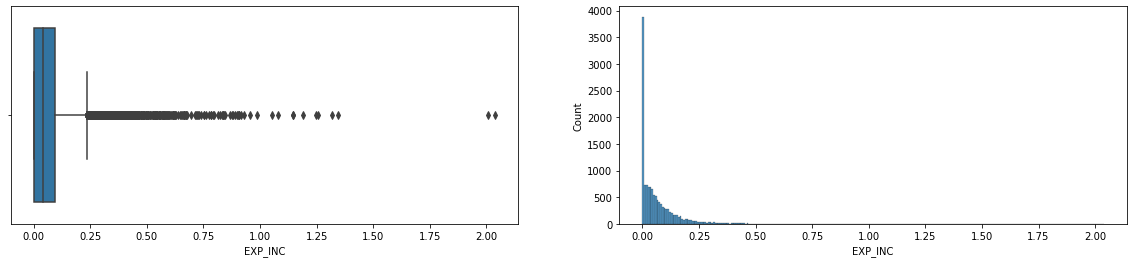

In [25]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
sns.boxplot(df['EXP_INC'], ax=ax[0])
sns.histplot(df['EXP_INC'], ax=ax[1]);

A noticeably high number of outliers with 'EXP_INC' (Ratio of monthly credit card expenditure to yearly income)

# **PAIRPLOT**

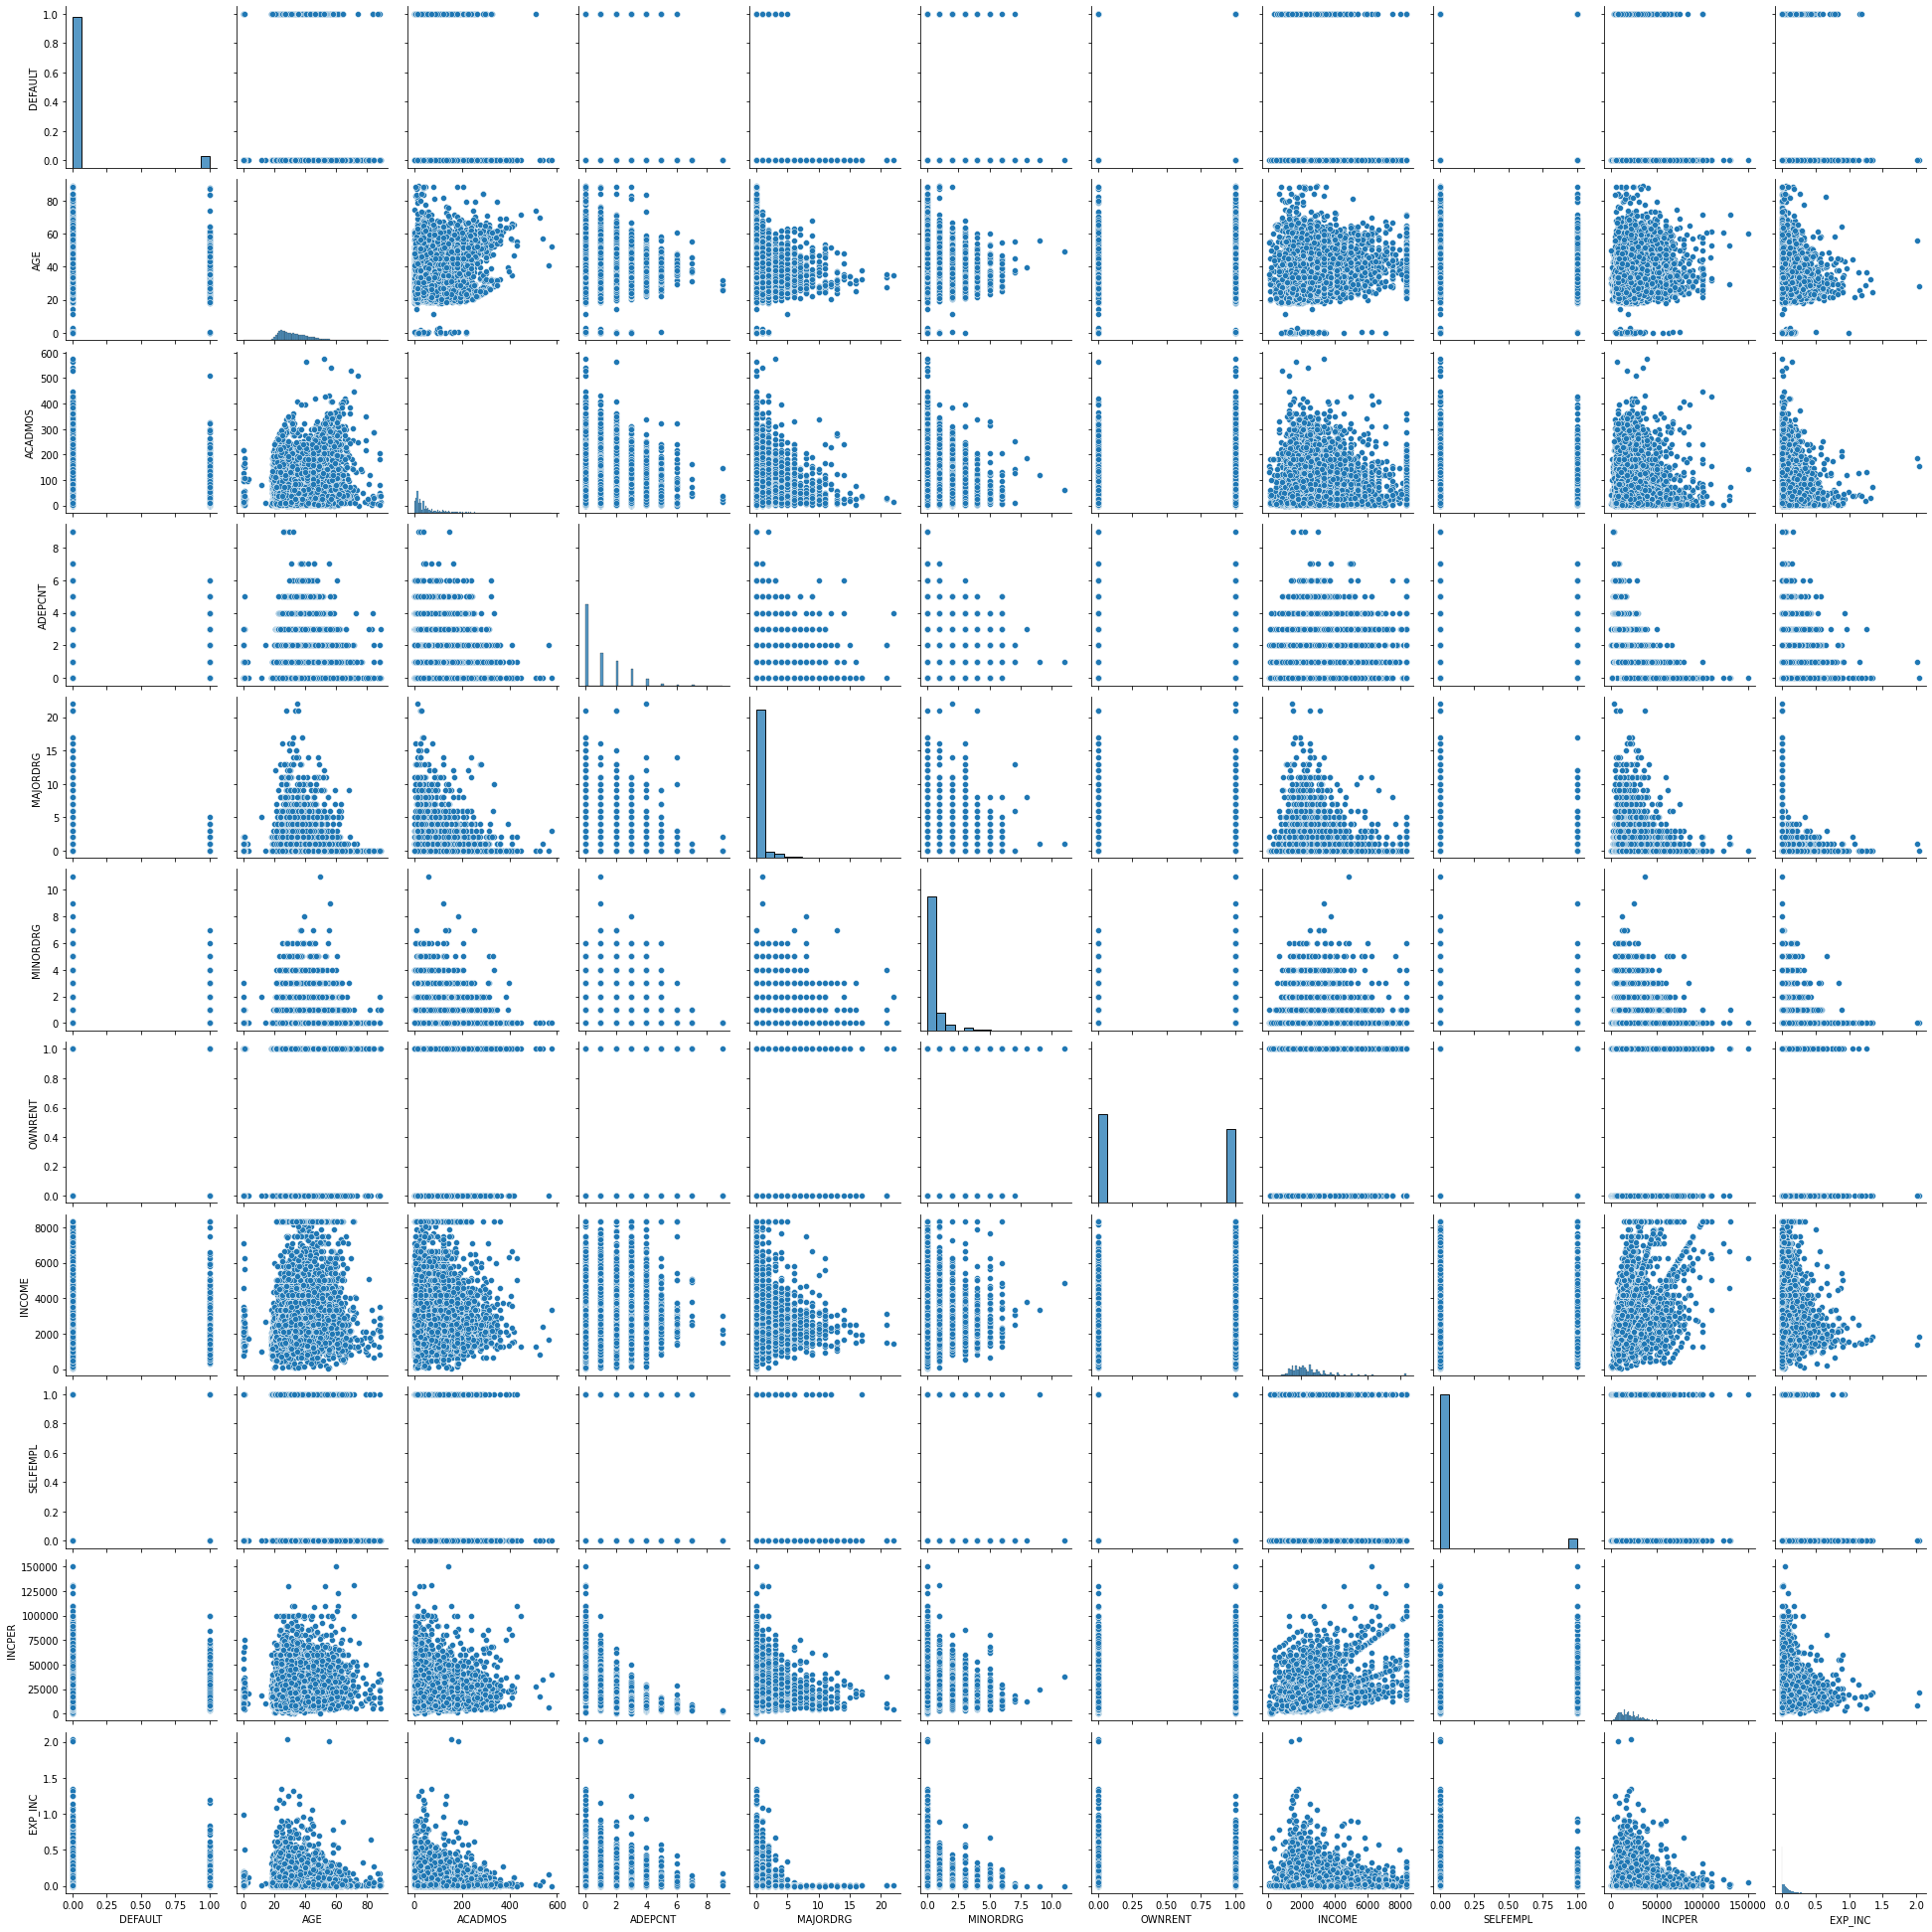

In [26]:
sns.pairplot(df)

# **HEATMAP**

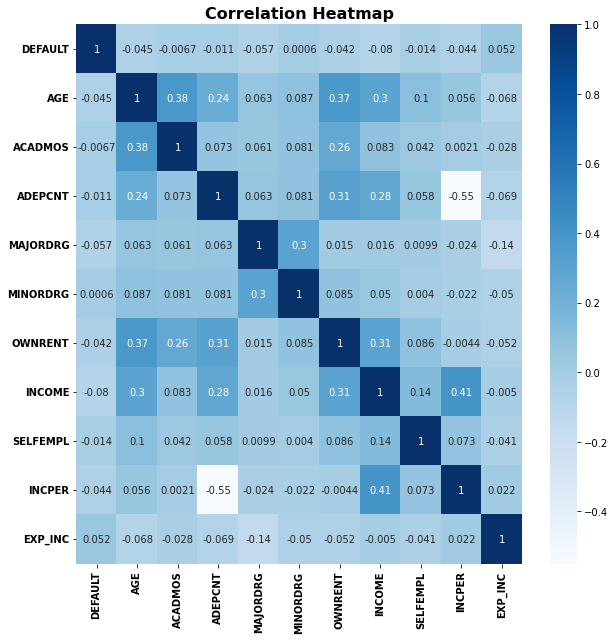

In [27]:
corr = df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, cmap='Blues', annot=True);
plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

The correlation matrix shows no strong positive or negative correlations between numeric data.

# **Defaulting in Payments**

Looking at features, factors or variables can/may default a credit card holder with his/her payments.

In [28]:
D1 = df.groupby('DEFAULT')['MAJORDRG'].sum()
D1

DEFAULT
0    6047
1     175
Name: MAJORDRG, dtype: int64

**Base on major derogatory reports:**

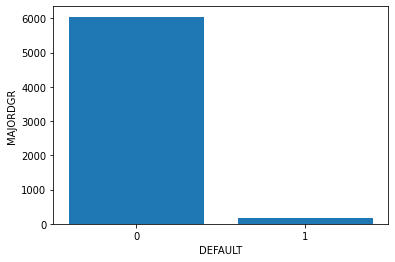

In [29]:
labels = [0, 1]
plt.bar(D1.index, D1.values)
plt.ylabel('MAJORDGR')
plt.xlabel('DEFAULT')
plt.xticks(labels)
plt.show()

In [30]:
D2 = df.groupby('DEFAULT')['INCOME'].mean() # Income diveded by 10,000
D2

DEFAULT
0    2537.805183
1    2156.117554
Name: INCOME, dtype: float64

**Based on income:**

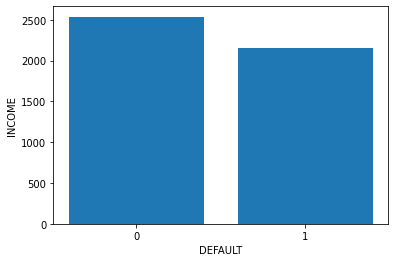

In [31]:
plt.bar(D2.index, D2.values)
plt.ylabel('INCOME')
plt.xlabel('DEFAULT')
plt.xticks(labels)

plt.show()

**Based on Self Employed (1) or Employed (0).**


In [32]:
D3 = df.groupby('DEFAULT')['SELFEMPL'].sum()
D3

DEFAULT
0    733
1     46
Name: SELFEMPL, dtype: int64

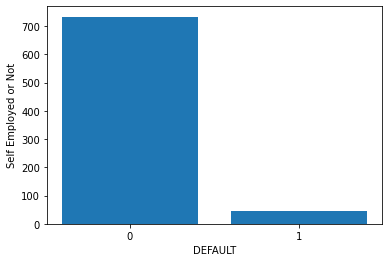

In [33]:
plt.bar(D3.index, D3.values)
plt.ylabel('Self Employed or Not')
plt.xlabel('DEFAULT')
plt.xticks(labels)

plt.show()

**Based on if consumer owns (1) or rents (0) their home.** 

In [34]:
D4 = df.groupby('DEFAULT')['OWNRENT'].sum()
D4

DEFAULT
0    5749
1     381
Name: OWNRENT, dtype: int64

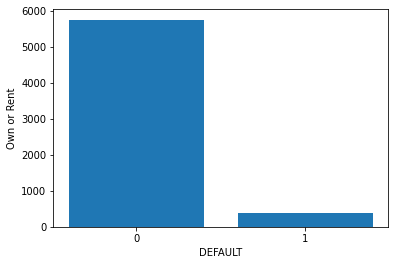

In [35]:
plt.bar(D4.index, D4.values)
plt.ylabel('Own or Rent')
plt.xlabel('DEFAULT')
plt.xticks(labels)

plt.show()

# **MACHINE LEARNING**

In [36]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC
# def evaluate_classification(model, X_test, y_test, cmap=None,
                            # normalize='true', classes=None, figsize=(20,5)):
  # test_preds = model.predict(X_test)
  # print(metrics.classification_report(y_test, test_preds, target_names=classes))

  # fig, ax = plt.subplots(ncols=3, figsize=figsize)
  # ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens',
                                        # display_labels=classes,
                                        # ax=ax[0])
  
  # ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',
                                        # display_labels=classes, normalize='true',
                                        # ax=ax[1])
  
  # curve = metrics.plot_roc_curve(model, X_test, y_test, ax=ax[2])
  # curve.ax_.grid()
  # curve.ax_.plot([0, 1], [0, 1], ls=':')

Assigning Target Vector and Independent Variable

In [37]:
X = df.drop(columns = 'DEFAULT')
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [38]:
# num_cols = make_column_selector(dtype_include="numbers")

In [39]:
scaler = StandardScaler()

In [40]:
# for evaluation
def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

**Baseline Model**

In [41]:
# Instantiate the Model
dummy = DummyClassifier()
# Create pipeline
dummy_pipe = make_pipeline(scaler, dummy)
# Fit the Model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dummyclassifier', DummyClassifier())])

Baseline Metrics


Predictions

In [42]:
# train_dummy_preds = dummy_pipe.predict(X_train)
# test_dummy_preds = dummy_pipe.predict(X_test)

In [43]:
train_dummy_score = dummy_pipe.score(X_train, y_train)
test_dummy_score = dummy_pipe.score(X_test, y_test)
print(f'Dummy Model Train Accuracy Score : {train_dummy_score}')
print(f'Dummy Model Test Accuracy Score : {test_dummy_score}')

Dummy Model Train Accuracy Score : 0.9274025587622732
Dummy Model Test Accuracy Score : 0.9214519488247546


**Logistic Regression Model**

In [44]:
# Instantiate the Model
logreg = LogisticRegression(C=1000)
# Create pipeline
logreg_pipe = make_pipeline(StandardScaler(), logreg)
# fit the model
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

In [45]:
# train_logreg_preds = logreg_pipe.predict(X_train)
# test_logreg_preds = logreg_pipe.predict(X_test)

In [46]:
train_logreg_score = logreg_pipe.score(X_train, y_train)
test_logreg_score = logreg_pipe.score(X_test, y_test)
print(f'Logreg Model Train Accuracy Score : {train_logreg_score}')
print(f'Logreg Model Test Accuracy Score : {test_logreg_score}')

Logreg Model Train Accuracy Score : 0.9274025587622732
Logreg Model Test Accuracy Score : 0.9211544183278786


Logistic Regression with params

In [47]:
#make a dictionary with parameters to tune the model
params = {'logisticregression__penalty':['l2','l1'], 
          'logisticregression__C':[0.0001, .001, .01, .1, 1, 10, 100], 
          'logisticregression__class_weight':[None, 'balanced'],
          'logisticregression__solver': ['liblinear']}

In [48]:
#use GridSearchCV to find best parameters for the model
logreg_grid = GridSearchCV(logreg_pipe, params)

logreg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(C=1000))]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__penalty': ['l2', 'l1'],
                         'logisticregression__solver': ['liblinear']})

In [49]:
# best parameters for the model
logreg_grid.best_params_

{'logisticregression__C': 0.0001,
 'logisticregression__class_weight': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [50]:
best_logreg = logreg_grid.best_estimator_

In [51]:
train_preds = best_logreg.predict(X_train)
test_preds = best_logreg.predict(X_test)
print('Best Model Train Metrics')
print(classification_report(y_train, train_preds))
print('\nBest Model Test Metrics')
print(classification_report(y_test, test_preds))

Best Model Train Metrics
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9351
           1       0.00      0.00      0.00       732

    accuracy                           0.93     10083
   macro avg       0.46      0.50      0.48     10083
weighted avg       0.86      0.93      0.89     10083


Best Model Test Metrics
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3097
           1       0.00      0.00      0.00       264

    accuracy                           0.92      3361
   macro avg       0.46      0.50      0.48      3361
weighted avg       0.85      0.92      0.88      3361



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

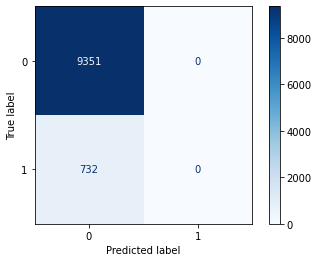

In [52]:
ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_train, y_train, cmap = "Blues")

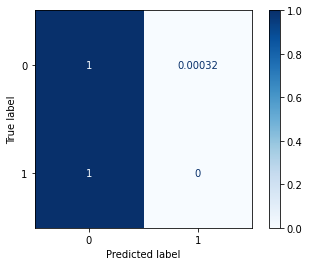

In [87]:
ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_test, y_test, normalize = 'true', cmap = "Blues")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


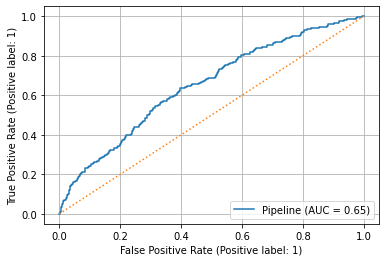

In [54]:
from sklearn import metrics
curve = metrics.plot_roc_curve(logreg_pipe, X_test, y_test)
curve.ax_.grid()
curve.ax_.plot([0,1], [0,1], ls = ':')

KNeighbors Classifier

In [55]:
# Instantiate the Model
knn = KNeighborsClassifier()

In [56]:
# Create pipeline
knnpipe = make_pipeline(scaler, knn)
# fit the model
knnpipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [57]:
train_knn_preds = knnpipe.predict(X_train)
test_knn_preds = knnpipe.predict(X_test)

Classification Report on Default KNeighbors Classifier

In [58]:
print('Training Metrics\n')
evaluate_classification(y_train, train_knn_preds)
print('\n')
print('Testing Metrics\n')
evaluate_classification(y_test, test_knn_preds)

Training Metrics

Accuracy: 0.9295844490726967 
Recall: [0.99839589 0.05054645] 
Precision: [0.93071478 0.71153846] 
F1 Score: [0.96336807 0.09438776]


Testing Metrics

Accuracy: 0.9181791133591193 
Recall: [0.9954795  0.01136364] 
Precision: [0.92194976 0.17647059] 
F1 Score: [0.95730477 0.02135231]


In [59]:
# evaluate_classification(knnpipe, X_test, y_test)

KNN tuned with GridSearch

In [60]:
knnpipe.get_params()

{'kneighborsclassifier': KNeighborsClassifier(),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform',
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False}

In [61]:
params = {'kneighborsclassifier__n_neighbors' : range(1,20,2),
          'kneighborsclassifier__weights' : ["uniform", "distance"],
          'kneighborsclassifier__p' : [2,3,4]}

In [62]:
knn_grid = GridSearchCV(knnpipe, params)

knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 20, 2),
                         'kneighborsclassifier__p': [2, 3, 4],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [63]:
knn_grid.best_params_

{'kneighborsclassifier__n_neighbors': 15,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [64]:
best_knn = knn_grid.best_estimator_

In [65]:
train_preds1 = best_knn.predict(X_train)
test_preds1 = best_knn.predict(X_test)
print('Best Model Train Metrics')
print(classification_report(y_train, train_preds1))
print('\nBest Model Test Metrics')
print(classification_report(y_test, test_preds1))

Best Model Train Metrics
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9351
           1       0.00      0.00      0.00       732

    accuracy                           0.93     10083
   macro avg       0.46      0.50      0.48     10083
weighted avg       0.86      0.93      0.89     10083


Best Model Test Metrics
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3097
           1       0.00      0.00      0.00       264

    accuracy                           0.92      3361
   macro avg       0.46      0.50      0.48      3361
weighted avg       0.85      0.92      0.88      3361



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


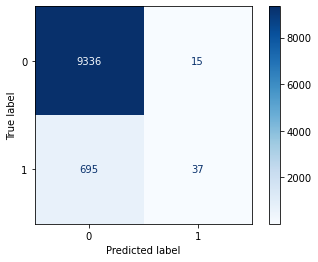

In [66]:
ConfusionMatrixDisplay.from_estimator(knnpipe, X_train, y_train, cmap = "Blues")

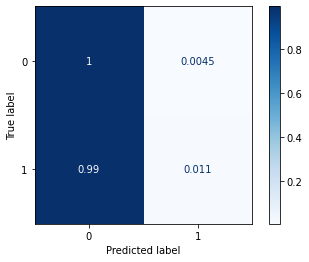

In [86]:
ConfusionMatrixDisplay.from_estimator(knnpipe, X_test, y_test, normalize = 'true', cmap = "Blues")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


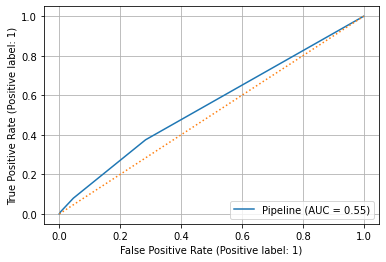

In [68]:
from sklearn import metrics
curve = metrics.plot_roc_curve(knnpipe, X_test, y_test)
curve.ax_.grid()
curve.ax_.plot([0,1], [0,1], ls = ':')

## **Random Forest Classifier**

In [69]:
rf = RandomForestClassifier(random_state=42)

In [70]:
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [71]:
train_rf_preds = rf_pipe.predict(X_train)
test_rf_preds = rf_pipe.predict(X_test)

Classification Report on Default Random Forest Classifier

In [72]:
print('Training Metrics\n')
evaluate_classification(y_train, train_rf_preds, average='macro')
print('\n')

print('Testing Metrics\n')
evaluate_classification(y_test, test_rf_preds, average='macro')

Training Metrics

Accuracy: 0.999900823167708 
Recall: 0.9993169398907105 
Precision: 0.9999465355004278 
F1 Score: 0.9996315028212528


Testing Metrics

Accuracy: 0.9211544183278786 
Recall: 0.5015710462715629 
Precision: 0.6275064522533254 
F1 Score: 0.4832185948818818


**Random Forest tuned with GridSearch**

In [73]:
rf_pipe.get_params()

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__random_state': 42,
 'randomforestclassifier__verbose': 0,
 'randomforestclassifier__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'stand

In [74]:
rf_params = {'randomforestclassifier__n_estimators': [20, 50, 100],
            'randomforestclassifier__max_depth' : [4,7,10,15,20],
            'randomforestclassifier__min_samples_split' : [2,10,100]}

In [75]:
rf_grid = GridSearchCV(rf_pipe, rf_params)

rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [4, 7, 10, 15,
                                                               20],
                         'randomforestclassifier__min_samples_split': [2, 10,
                                                                       100],
                         'randomforestclassifier__n_estimators': [20, 50, 100]})

In [76]:
rf_grid.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 20}

In [77]:
best_rf = rf_grid.best_estimator_

In [78]:
train_preds1 = best_rf.predict(X_train)
test_preds1 = best_rf.predict(X_test)
print('Best Model Train Metrics')
print(classification_report(y_train, train_preds1))
print('\nBest Model Test Metrics')
print(classification_report(y_test, test_preds1))

Best Model Train Metrics
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9351
           1       1.00      0.07      0.12       732

    accuracy                           0.93     10083
   macro avg       0.97      0.53      0.54     10083
weighted avg       0.94      0.93      0.90     10083


Best Model Test Metrics
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3097
           1       0.00      0.00      0.00       264

    accuracy                           0.92      3361
   macro avg       0.46      0.50      0.48      3361
weighted avg       0.85      0.92      0.88      3361



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


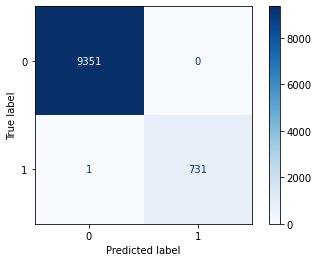

In [79]:
ConfusionMatrixDisplay.from_estimator(rf_pipe, X_train, y_train, cmap = "Blues")

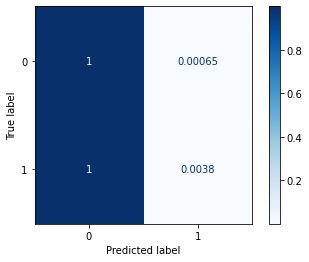

In [85]:
ConfusionMatrixDisplay.from_estimator(rf_pipe, X_test, y_test, normalize = 'true', cmap = "Blues")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


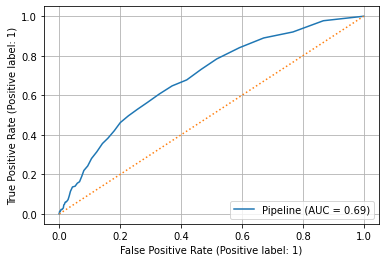

In [81]:
curve = metrics.plot_roc_curve(rf_pipe, X_test, y_test)
curve.ax_.grid()
curve.ax_.plot([0,1], [0,1], ls = ':')

Trying out Boosting and balancing the classes

In [82]:
# XGB 
from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight = "balanced")
xgb_pipe = make_pipeline(StandardScaler(), xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier', XGBClassifier(class_weight='balanced'))])

In [83]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC
def evaluate_classification(model, X_test, y_test, cmap=None,
                            normalize='true', classes=None, figsize=(20,5)):
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=3, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens',
                                        display_labels=classes,
                                        ax=ax[0])
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])
  
  curve = metrics.plot_roc_curve(model, X_test, y_test, ax=ax[2])
  curve.ax_.grid()
  curve.ax_.plot([0, 1], [0, 1], ls=':')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3097
           1       0.50      0.00      0.01       264

    accuracy                           0.92      3361
   macro avg       0.71      0.50      0.48      3361
weighted avg       0.89      0.92      0.88      3361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


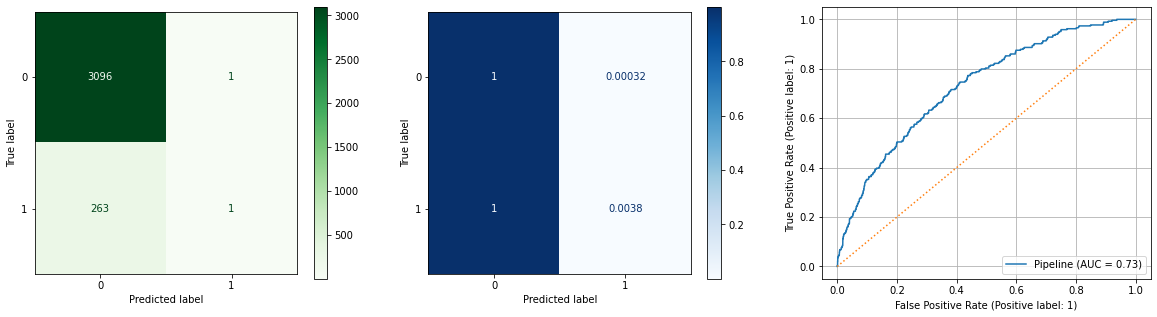

In [84]:
evaluate_classification(xgb_pipe, X_test, y_test)

Random Forest Model is recommended due to having the highest Train/Test Accuracy score. Though "Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading."


In [ ]:
#Metrics that can provide better insight are:

#Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
#Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
#Recall: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
#F1: Score: the weighted average of precision and recall.
#Area Under ROC Curve (AUROC): AUROC represents the likelihood of your model distinguishing observations from two classes.
#In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?

# Source : https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/ 